# Time series of radiation biases from different models
Now we want to use the function that produces us time series of the model data including the individual CERES years to show us the variability

In [90]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import gregory_plot, barplot_model_data, plot_model_comparison_timeseries, plot_bias, plot_maps

In [91]:
lumi=True

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [95]:
if lumi:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'historical-1990-devcon' , source = 'lra-r100-monthly')
else:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
    ifs_9km = process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')
    icon = process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly")
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly')

2023-10-18 18:59:15 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-18 18:59:15 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-18 18:59:15 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-18 18:59:15 :: Reader :: WARNING  -> Would be safer to run with fix=False
/LUMI_TYKKY_PuGxLUy/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


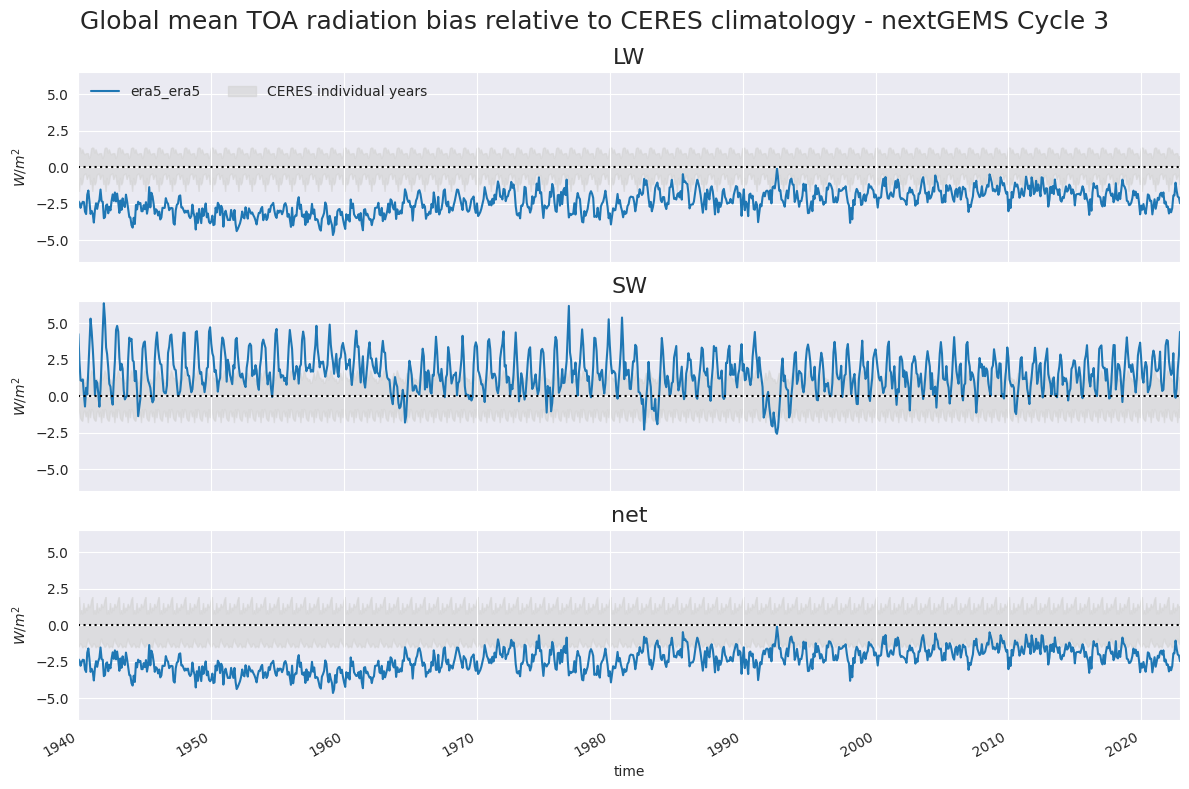

In [98]:
if lumi:
    models = [era5]
    plot_model_comparison_timeseries(models, ceres=ceres)
else:
    models = [icon, ifs_4km, ifs_9km]
    plot_model_comparison_timeseries(models, ceres=ceres, outputdir='./', outputfig='./')
